In [15]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [16]:
from fastai import *
from fastai.vision import *
from pathlib import Path

In [83]:
def topk_accuracy(preds, targets, k):
    _, topk = preds[0].topk(k,1,True,True)    
    correct = 0
    
    for i in range(k):
        correct += sum(targets == topk[:,i:i+1]).double()
    
    
    accu = correct / topk.size(0)
    
    return accu.tolist()[0]

In [62]:
#path_img = Path('./dataset_20_images/train')
path_img = Path('./image-classify-celeb/')

In [19]:
path_img.ls()

['train', 'test', 'get_celeb_pics.py', 'valid']

fnames = []
for i in path_img.ls():
    fnames += get_image_files(path_img/i)

np.random.seed(2)
pat = r'/train/(.*)/'

data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=299,valid_pct=0.2)
data.normalize(imagenet_stats)

In [20]:
data = ImageDataBunch.from_folder(path_img, ds_tfms=get_transforms(), size=299)
data.normalize(imagenet_stats)

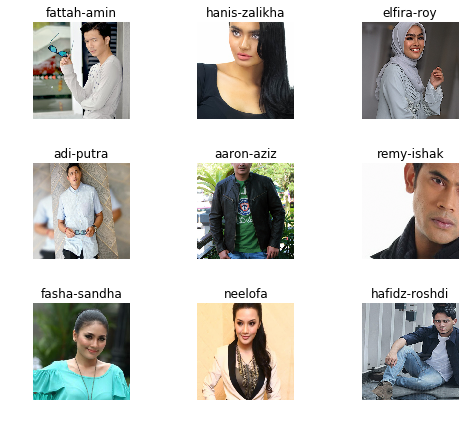

In [21]:
data.show_batch(rows=3, figsize=(7,6), is_train=True)

In [22]:
print(data.classes)
len(data.classes),data.c

['aaron-aziz', 'adi-putra', 'awal-ashaari', 'bront-palarae', 'elfira-roy', 'fahrin-ahmad', 'fasha-sandha', 'fattah-amin', 'hafidz-roshdi', 'hanis-zalikha', 'iqram-dinzly', 'lisa-surihani', 'neelofa', 'nora-danish', 'nur-fazura', 'remy-ishak', 'rosyam-nor', 'rozita-che-wan', 'scha-alyahya', 'siti-nurhaliza']


(20, 20)

In [23]:
learn = ConvLearner(data, models.resnet50, metrics=error_rate)

In [24]:
learn.unfreeze()
learn.fit_one_cycle(5)

Total time: 03:47
epoch  train loss  valid loss  error_rate
1      3.087337    5.072935    0.894286    (01:25)
2      2.587140    3.180340    0.851429    (00:36)
3      2.371989    2.666618    0.757143    (00:35)
4      2.073421    2.338003    0.700000    (00:35)
5      1.824687    2.095721    0.668571    (00:34)



In [30]:
learn.lr_find()

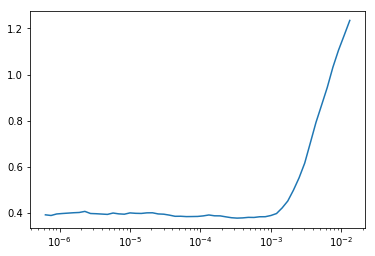

In [31]:
learn.recorder.plot()


In [32]:
learn.save('stage-1-50-raw')

In [37]:
learn.load('stage-1-50-raw')

In [38]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(1e-9,1e-6))

Total time: 00:35
epoch  train loss  valid loss  error_rate
1      0.388697    1.970505    0.588571    (00:35)



In [39]:
interp = ClassificationInterpretation.from_learner(learn)

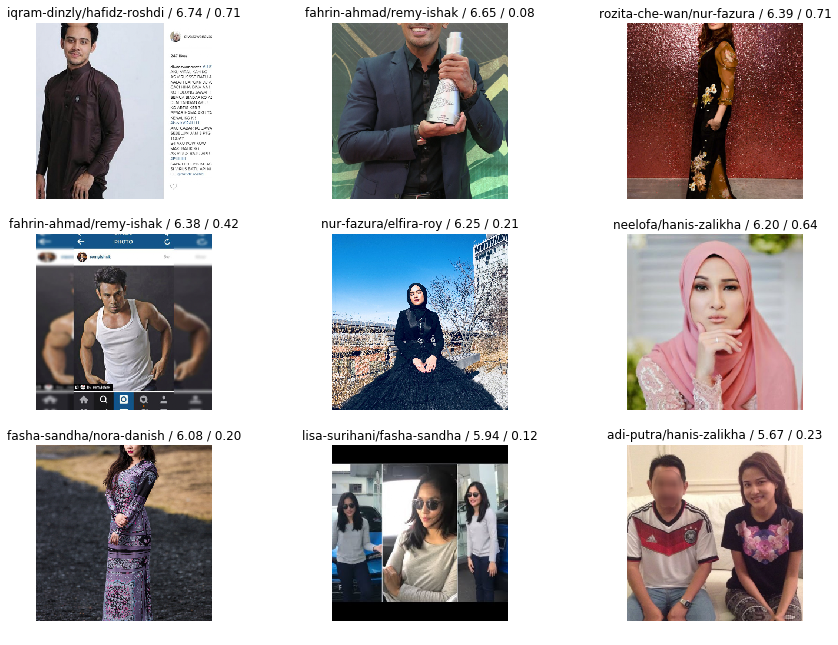

In [40]:
interp.plot_top_losses(9, figsize=(15,11))

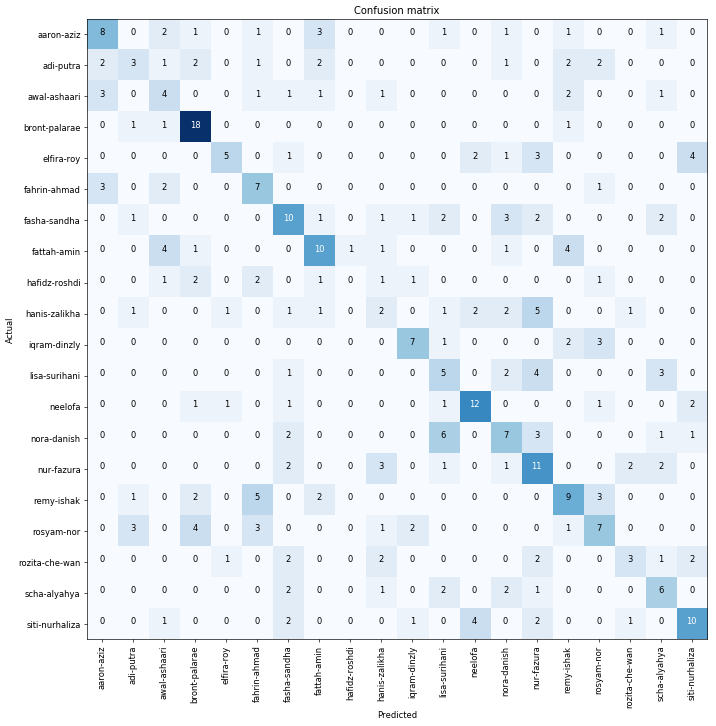

In [41]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)



In [42]:
preds = learn.get_preds()

targets = torch.from_numpy(data.valid_ds.ds.y.reshape(-1,1))



In [86]:
topk_accuracy(preds,targets,3)

0.6942857142857143